## Objective : Learning the usage of PCA in recommendations using decision trees
## Problem : Consider the data given below: Estimate the ratings $r_{21}$ and $r_{74}$ after reducing the dimension using PCA.

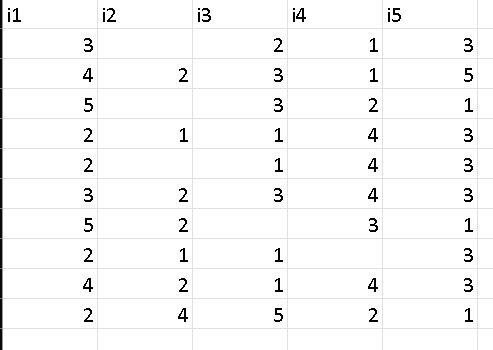

## Step 1 : Data Preperation

In [1]:
import pandas as pd
df=pd.read_csv("C:/Users/Mohan/Pictures/Media/WhatsApp Documents/dec-pca.csv")
df


,i1,i2,i3,i4,i5
0,3,NaN,2.0,1.0,3
1,4,2.0,3.0,1.0,5
2,5,NaN,3.0,2.0,1
3,2,1.0,1.0,4.0,3
4,2,NaN,1.0,4.0,3
5,3,2.0,3.0,4.0,3
6,5,2.0,NaN,3.0,1
7,2,1.0,1.0,NaN,3
8,4,2.0,1.0,4.0,3
9,2,4.0,5.0,2.0,1


## Step-2 : Dropping rows with missing values

In [2]:
df_full=df.dropna()
df_full


,i1,i2,i3,i4,i5
1,4,2.0,3.0,1.0,5
3,2,1.0,1.0,4.0,3
5,3,2.0,3.0,4.0,3
8,4,2.0,1.0,4.0,3
9,2,4.0,5.0,2.0,1


## Step-3 : To predict $r_{21}$ we treat the second column as response and others as regressors

## Seperation of regressors and response

In [3]:
X=df_full.iloc[:,[0,2,3,4]] # regressor
y=df_full.iloc[:,1] # response
X


,i1,i3,i4,i5
1,4,3.0,1.0,5
3,2,1.0,4.0,3
5,3,3.0,4.0,3
8,4,1.0,4.0,3
9,2,5.0,2.0,1


## Dimension Reduction

In [4]:
from sklearn.decomposition import PCA
import numpy as np
pca=PCA()
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)


array([0.5382876 , 0.91404021, 0.97034905, 1.        ])

## Assume, it is decided to retain 90% variance. In this case, we have to retain only 2 features

In [5]:
pca=PCA(n_components=2)
pca.fit(X)
X_red=pca.transform(X)
X_red


array([[ 0.2927037 ,  3.00520003],
       [-1.51913323, -1.13136872],
       [-0.12204071, -0.56874544],
       [-1.92163197, -0.30818626],
       [ 3.27010221, -0.99689962]])

## Fitting a decision tree based on the reduced data; here we treat the X_red as data and y as target

In [6]:
from sklearn import tree
clf=tree.DecisionTreeClassifier()
model1=clf.fit(X_red,y)


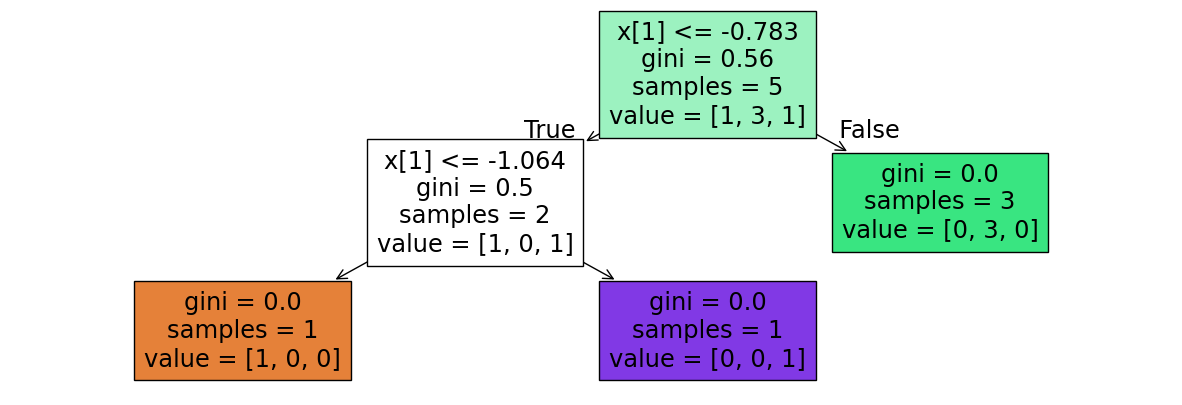

In [7]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(15,5))
_=tree.plot_tree(clf,filled=True)


## Inline Prediction

In [8]:
model1.predict(X_red) # inline prediction


array([2., 1., 2., 2., 4.])

## Predicting $r_{21}$
### Note that the values of available features for this instance are 3,2,1,3

In [9]:
test=np.array([[3,2,1,3]])
test_red=pca.transform(test)
model1.predict(test_red)


c:\Users\Mohan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([2.])

## Predicted rating is 2

## Step 4: Prediction of $r_{74}$

In [10]:
X=df_full.iloc[:,[0,1,2,4]] # regressor
y=df_full.iloc[:,3] # response
pca=PCA()
pca.fit(X)
np.cumsum(pca.explained_variance_ratio_)


array([0.68490769, 0.92294335, 0.99606983, 1.        ])

In [11]:
pca=PCA(n_components=2)
pca.fit(X)
X_red=pca.transform(X)


In [12]:
clf=tree.DecisionTreeClassifier()
model2=clf.fit(X_red,y)


In [13]:
test=np.array([[2,1,1,3]])
test_red=pca.transform(test)
model2.predict(test_red)


c:\Users\Mohan\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


array([4.])

## Conclusion:
## Predicted rating is 4